Project name: New York City Taxi Fare Prediction - Can you predict a rider's taxi fare?

Objective: To train a ML model to predict the fare for a taxi ride in New York city given info like pickup date & time, 
pickup location, drop location and no. of passengers

Dataset Link: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction
Below are the files and data descriptions:

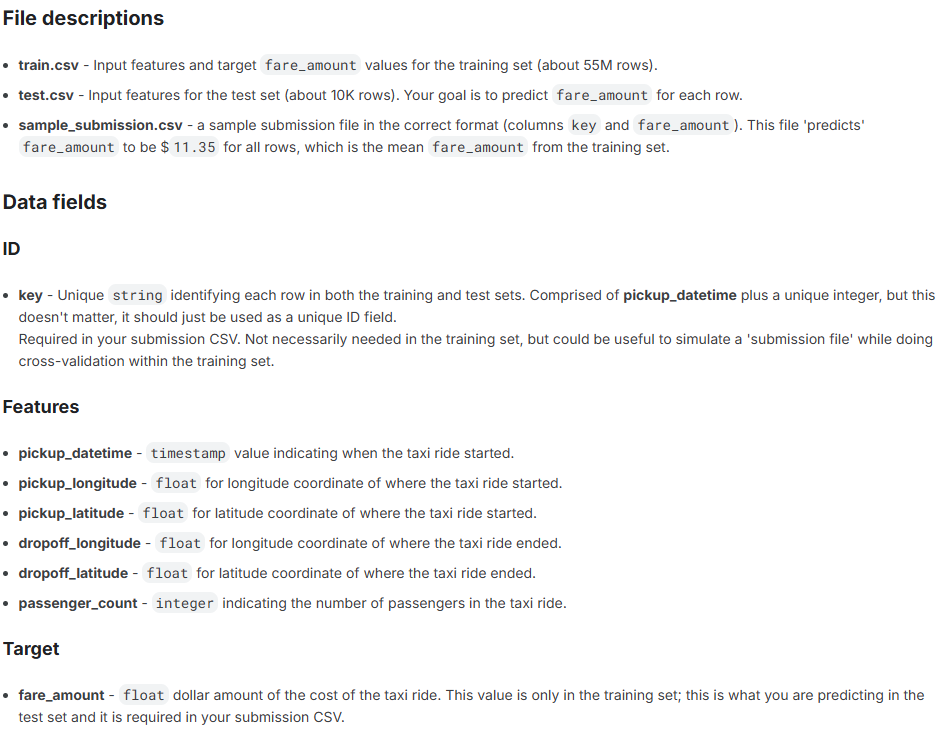

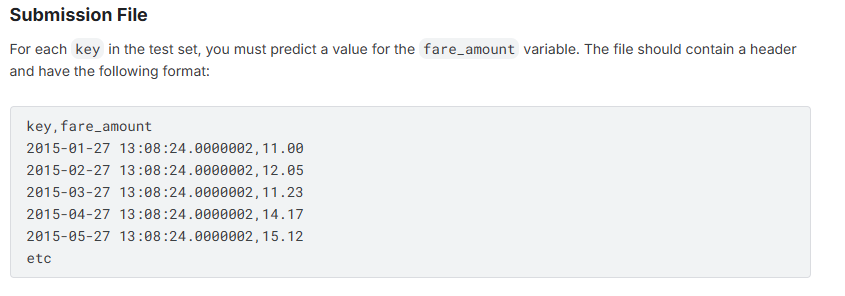

Project Outline:

1. Download the dataset
2. Explore & analyze the dataset
3. Prepare the dataset for ML training
4. Train hardcoded & baseline models
5. Make predictions & submit to Kaggle
6. Peform feature engineering
7. Train & evaluate different models
8. Tune hyperparameters for the best models
9. Document & publish the project online

In [2]:
#1. Download the dataset

In [1]:
#Install required libraries
!pip install opendatasets pandas numpy scikit-learn xgboost --quiet

In [2]:
#Download Data from Kaggle using opendatasets library. 
#For that, I need to upload my Kaggle API key (found in my Kaggle profile under 'API'). 
#Click on 'Create New API Token' to download the kaggle.json to my PC. Now open this file (via Notepad) to view.

import opendatasets as od
dataset_url = 'https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview'

In [5]:
#Type my Kaggle username and copy paste my API key below
%%time
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: skyeshwin
Your Kaggle Key: ········


100%|██████████| 1.56G/1.56G [05:25<00:00, 5.14MB/s]



Extracting archive .\new-york-city-taxi-fare-prediction/new-york-city-taxi-fare-prediction.zip to .\new-york-city-taxi-fare-prediction
CPU times: total: 1min 25s
Wall time: 7min 48s


In [3]:
data_dir = './new-york-city-taxi-fare-prediction'

In [4]:
!pip install bash_kernel

In [5]:
!python -m bash_kernel.install

Installing IPython kernel spec


In [3]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

In [6]:
ls

 Volume in drive C is Windows
 Volume Serial Number is B2EE-C5B8

 Directory of C:\Users\skyes\Documents\Projects

12/29/2024  01:23 PM    <DIR>          .
11/03/2024  02:12 AM    <DIR>          ..
12/24/2024  09:11 AM    <DIR>          .ipynb_checkpoints
12/24/2024  10:05 AM                23 .jovianrc
12/17/2024  05:17 PM         7,697,622 1. Python ML - Linear Regression.ipynb
12/17/2024  05:18 PM        22,461,717 2. Python ML - Logistic Regression.ipynb
12/16/2024  10:32 PM         3,694,433 3. Python ML - Decision Trees and Random Forests.ipynb
12/20/2024  12:46 PM         1,473,440 4. Python ML - Gradient Boosting Machines (GBMs) with XGBoost.ipynb
12/20/2024  11:11 PM           729,941 5. Python ML - Unsupervised Learning using Scikit-Learn.ipynb
12/16/2024  12:15 PM            12,675 aussie_rain.joblib
12/16/2024  12:03 PM            12,749 aussie_rain_1216.joblib
12/17/2024  05:14 PM         1,278,781 how-to-approach-ml-problems.ipynb
12/25/2024  11:01 AM           392,230 li

In [7]:
import pandas as pd
import numpy as np

In [8]:
!head 'C:/Users/skyes/Documents/Projects/new-york-city-taxi-fare-prediction/train.csv'

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [9]:
# No. of lines in training set
!wc -l new-york-city-taxi-fare-prediction/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [32]:
#Type the below on Anaconda Prompt to enable all bash commands in Jupyter Notebook

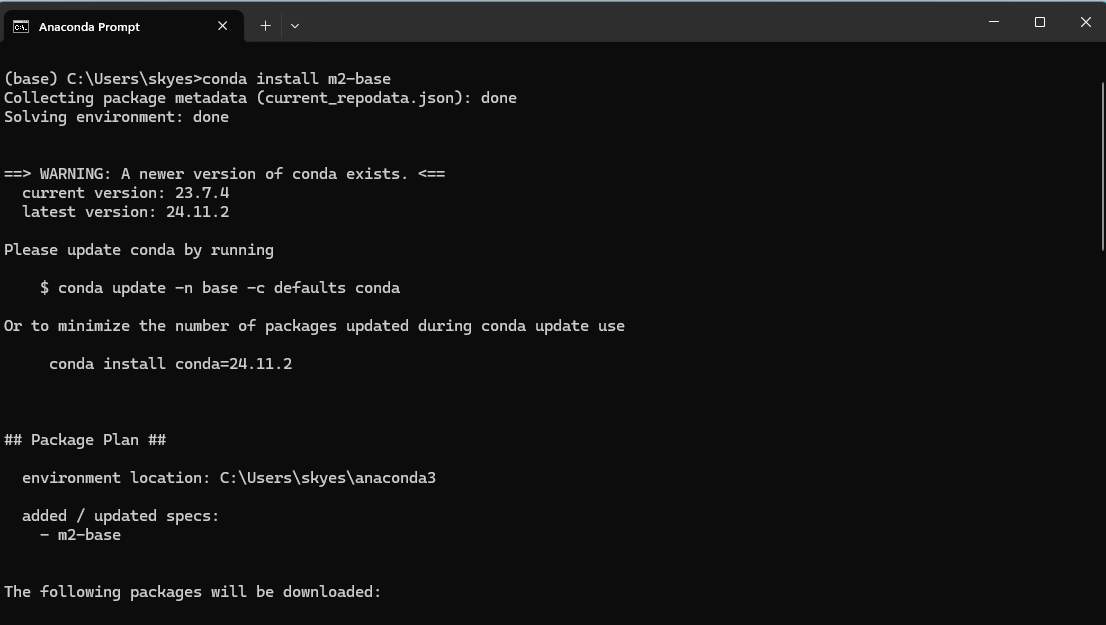

In [40]:
!ls

1. Python ML - Linear Regression.ipynb
2. Python ML - Logistic Regression.ipynb
3. Python ML - Decision Trees and Random Forests.ipynb
4. Python ML - Gradient Boosting Machines (GBMs) with XGBoost.ipynb
5. Python ML - Unsupervised Learning using Scikit-Learn.ipynb
New York City Taxi Fare Prediction - Python Machine Learning Project 1.ipynb
Python - Pandas Basics.ipynb
Python Programming.ipynb
aussie_rain.joblib
aussie_rain_1216.joblib
how-to-approach-ml-problems.ipynb
new-york-city-taxi-fare-prediction
projects
submission.csv
test_inputs.parquet
test_targets.parquet
train_inputs.parquet
train_targets.parquet
val_inputs.parquet
val_targets.parquet


In [41]:
#View Dataset Files
!ls -lh {data_dir}

total 5.4G
-rw-r--r-- 1 skyes skyes  486 Dec 24 09:47 GCP-Coupons-Instructions.rtf
-rw-r--r-- 1 skyes skyes 336K Dec 24 09:47 sample_submission.csv
-rw-r--r-- 1 skyes skyes 960K Dec 24 09:47 test.csv
-rw-r--r-- 1 skyes skyes 5.4G Dec 24 09:48 train.csv


In [10]:
# No. of lines in training set
!wc -l new-york-city-taxi-fare-prediction/train.csv

55423856 new-york-city-taxi-fare-prediction/train.csv


In [11]:
# No. of lines in test set
!wc -l new-york-city-taxi-fare-prediction/test.csv

9914 new-york-city-taxi-fare-prediction/test.csv


In [12]:
# No. of lines in submission set
!wc -l new-york-city-taxi-fare-prediction/sample_submission.csv

9915 new-york-city-taxi-fare-prediction/sample_submission.csv


In [13]:
# Training set
!head {data_dir}/train.csv

key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.76127,-73.991242,40.750562,2
2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.98713,40.733143,-73.991567,40.758092,1
2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.73163,-73.972892,40.758233,1
2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.9513,40.774138,-73.990095,40.751048,1
2012-12-03 13:10:00.000000125,9,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.99

In [14]:
# Test set
!head {data_dir}/test.csv

key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320007324219,40.7638053894043,-73.981430053710938,40.74383544921875,1
2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862182617188,40.719383239746094,-73.998886108398438,40.739200592041016,1
2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.75126,-73.979654,40.746139,1
2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.98116,40.767807,-73.990448,40.751635,1
2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.01409

In [15]:
# Sample submission file
!head {data_dir}/sample_submission.csv

key,fare_amount
2015-01-27 13:08:24.0000002,11.35
2015-01-27 13:08:24.0000003,11.35
2011-10-08 11:53:44.0000002,11.35
2012-12-01 21:12:12.0000002,11.35
2012-12-01 21:12:12.0000003,11.35
2012-12-01 21:12:12.0000005,11.35
2011-10-06 12:10:20.0000001,11.35
2011-10-06 12:10:20.0000003,11.35
2011-10-06 12:10:20.0000002,11.35


Observations:

1. This is a supervised learning regression problem.

2. Training data is 5.4 GB in size.
3. Training data has 55 million rows.
4. The training set has 8 columns:
    a. key (a unique identifier)
    b. fare_amount (target column)
    c. pickup_datetime
    d. pickup_longitude
    e. pickup_latitude
    f. dropoff_longitude
    g. dropoff_latitude
    h. passenger_count
    
5. Test set is much smaller (< 10,000 rows).
6. The test set has all columns except the target column fare_amount.
7. The submission file should contain the key and fare_amount for each test sample.

In [16]:
#Loading Training Set

#When working with large datasets, always start with a sample to experiment and iterate faster.
import pandas as pd

Loading the entire dataset into Pandas is going to be slow, so I'm gonna use the following optimizations:

1. Ignore the 'key' column.
2. Parse pickup datetime while loading data.
3. Specify data types for other columns:
    a. float32 for geo coordinates
    b. float32 for fare amount
    c. uint8 for passenger count
4. Work with a 1% sample of the data (~550k rows).
5. I'll apply these optimizations while using pd.read_csv

In [17]:
selected_cols = 'fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count'.split(',')

In [18]:
selected_cols

['fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [19]:
sample_fraction = 0.01

In [20]:
import random
random.random()

0.7400344522076431

In [21]:
dtypes = {
    'fare_amount': 'float32',
    'pickup_longitude': 'float32',
    'pickup_latitude': 'float32',
    'dropoff_longitude': 'float32',
    'dropoff_latitude': 'float32',
    'passenger_count': 'uint8'
}

In [22]:
def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_fraction
random.seed(42) #Fix the seeds for random number generators so that I get the same results everytime I run this notebook.
df = pd.read_csv(data_dir+'/train.csv', usecols=selected_cols, parse_dates = ['pickup_datetime'], dtype=dtypes, skiprows=skip_row)

In [23]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1


In [24]:
#Loading Test Set

test_df = pd.read_csv(data_dir+'/test.csv', dtype=dtypes, parse_dates=['pickup_datetime'])
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6


In [66]:
#2. Explore & analyze the dataset

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552450 entries, 0 to 552449
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        552450 non-null  float32            
 1   pickup_datetime    552450 non-null  datetime64[ns, UTC]
 2   pickup_longitude   552450 non-null  float32            
 3   pickup_latitude    552450 non-null  float32            
 4   dropoff_longitude  552450 non-null  float32            
 5   dropoff_latitude   552450 non-null  float32            
 6   passenger_count    552450 non-null  uint8              
dtypes: datetime64[ns, UTC](1), float32(5), uint8(1)
memory usage: 15.3 MB


In [27]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [28]:
#Looking at the above data, there are quite a few -ve values which don't make sense.

In [29]:
df[['fare_amount', 'passenger_count']].describe()

,fare_amount,passenger_count
count,552450.000000,552450.000000
mean,11.354059,1.684983
std,9.810809,1.337664
min,-52.000000,0.000000
25%,6.000000,1.000000
50%,8.500000,1.000000
75%,12.500000,2.000000
max,499.000000,208.000000


In [30]:
df['pickup_datetime'].min(), df['pickup_datetime'].max()

(Timestamp('2009-01-01 00:11:46+0000', tz='UTC'),
 Timestamp('2015-06-30 23:59:54+0000', tz='UTC'))

In [31]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                9914 non-null   object             
 1   pickup_datetime    9914 non-null   datetime64[ns, UTC]
 2   pickup_longitude   9914 non-null   float32            
 3   pickup_latitude    9914 non-null   float32            
 4   dropoff_longitude  9914 non-null   float32            
 5   dropoff_latitude   9914 non-null   float32            
 6   passenger_count    9914 non-null   uint8              
dtypes: datetime64[ns, UTC](1), float32(4), object(1), uint8(1)
memory usage: 319.6+ KB


In [32]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273
std,0.042799,0.033542,0.039093,0.035436,1.278747
min,-74.252190,40.573143,-74.263245,40.568974,1.000000
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000
max,-72.986534,41.709557,-72.990967,41.696682,6.000000


In [33]:
#There are quite a few -ve values in the test set as well, which don't make sense.

In [34]:
test_df['pickup_datetime'].min(), test_df['pickup_datetime'].max()

(Timestamp('2009-01-01 11:04:24+0000', tz='UTC'),
 Timestamp('2015-06-30 20:03:50+0000', tz='UTC'))

In [35]:
#Training set and test set have same range of datetime values.

In [36]:
#Exploratory Data Analysis and Visualization

In [99]:
#Date

#Let's convert Date to a datetime column and extract different parts of the date.

def split_date(df):
    df['Date'] = pd.to_datetime(df['pickup_datetime'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['DayName'] = df['pickup_datetime'].dt.day_name()
    df['DayOfWeek'] = df['pickup_datetime'].dt.weekday
    df['WeekOfYear'] = df.Date.dt.isocalendar().week
    df['Hour'] = df['pickup_datetime'].dt.hour
    df['Minute'] = df['pickup_datetime'].dt.minute

In [100]:
split_date(df)

In [101]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Date,Year,Month,Day,WeekOfYear,Hour,Minute,DayOfWeek,DayName
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,2014-12-06 20:36:22+00:00,2014,12,6,49,20,36,5,Saturday
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013-01-17 17:22:00+00:00,2013,1,17,3,17,22,3,Thursday
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2011-06-15 18:07:00+00:00,2011,6,15,24,18,7,2,Wednesday
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,2009-12-14 12:33:00+00:00,2009,12,14,51,12,33,0,Monday
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,2013-11-06 11:26:54+00:00,2013,11,6,45,11,26,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1,2014-02-06 23:59:45+00:00,2014,2,6,6,23,59,3,Thursday
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2,2015-01-05 15:29:08+00:00,2015,1,5,2,15,29,0,Monday
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1,2013-02-17 22:27:00+00:00,2013,2,17,7,22,27,6,Sunday
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1,2013-01-27 12:41:00+00:00,2013,1,27,4,12,41,6,Sunday


In [102]:
#Find the distance between drop-off and pickup points
import numpy as np
diff = (df[['pickup_latitude','pickup_longitude']].to_numpy()-df[['dropoff_latitude','dropoff_longitude']].to_numpy())
df['distance'] = np.sqrt((diff*diff).sum(-1))

In [103]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Date,Year,Month,Day,WeekOfYear,Hour,Minute,DayOfWeek,DayName,distance
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,2014-12-06 20:36:22+00:00,2014,12,6,49,20,36,5,Saturday,0.003597
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013-01-17 17:22:00+00:00,2013,1,17,3,17,22,3,Thursday,0.000000
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2011-06-15 18:07:00+00:00,2011,6,15,24,18,7,2,Wednesday,0.022197
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,2009-12-14 12:33:00+00:00,2009,12,14,51,12,33,0,Monday,0.000000
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,2013-11-06 11:26:54+00:00,2013,11,6,45,11,26,2,Wednesday,0.012811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1,2014-02-06 23:59:45+00:00,2014,2,6,6,23,59,3,Thursday,0.147150
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2,2015-01-05 15:29:08+00:00,2015,1,5,2,15,29,0,Monday,0.088114
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1,2013-02-17 22:27:00+00:00,2013,2,17,7,22,27,6,Sunday,0.010330
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1,2013-01-27 12:41:00+00:00,2013,1,27,4,12,41,6,Sunday,0.054824


In [130]:
!pip install haversine
import haversine as hs

In [107]:
df['pickup'] = list(zip(df.pickup_latitude, df.pickup_longitude))
df['dropoff'] = list(zip(df.dropoff_latitude, df.dropoff_longitude))

In [108]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Date,Year,Month,Day,WeekOfYear,Hour,Minute,DayOfWeek,DayName,distance,pickup,dropoff
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,2014-12-06 20:36:22+00:00,2014,12,6,49,20,36,5,Saturday,0.003597,"(40.75190353393555, -73.97981262207031)","(40.7554817199707, -73.97944641113281)"
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013-01-17 17:22:00+00:00,2013,1,17,3,17,22,3,Thursday,0.000000,"(0.0, 0.0)","(0.0, 0.0)"
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2011-06-15 18:07:00+00:00,2011,6,15,24,18,7,2,Wednesday,0.022197,"(40.75322341918945, -73.99633026123047)","(40.766963958740234, -73.97889709472656)"
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,2009-12-14 12:33:00+00:00,2009,12,14,51,12,33,0,Monday,0.000000,"(40.74574661254883, -73.98242950439453)","(40.74574661254883, -73.98242950439453)"
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,2013-11-06 11:26:54+00:00,2013,11,6,45,11,26,2,Wednesday,0.012811,"(40.78105926513672, -73.95906066894531)","(40.76860427856445, -73.9620590209961)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552445,45.0,2014-02-06 23:59:45+00:00,-73.973587,40.747669,-73.999916,40.602894,1,2014-02-06 23:59:45+00:00,2014,2,6,6,23,59,3,Thursday,0.147150,"(40.7476692199707, -73.97358703613281)","(40.6028938293457, -73.99991607666016)"
552446,22.5,2015-01-05 15:29:08+00:00,-73.935928,40.799656,-73.985710,40.726952,2,2015-01-05 15:29:08+00:00,2015,1,5,2,15,29,0,Monday,0.088114,"(40.79965591430664, -73.93592834472656)","(40.726951599121094, -73.98571014404297)"
552447,4.5,2013-02-17 22:27:00+00:00,-73.992531,40.748619,-73.998436,40.740143,1,2013-02-17 22:27:00+00:00,2013,2,17,7,22,27,6,Sunday,0.010330,"(40.748619079589844, -73.9925308227539)","(40.740142822265625, -73.9984359741211)"
552448,14.5,2013-01-27 12:41:00+00:00,-74.012115,40.706635,-73.988724,40.756218,1,2013-01-27 12:41:00+00:00,2013,1,27,4,12,41,6,Sunday,0.054824,"(40.706634521484375, -74.01211547851562)","(40.75621795654297, -73.98872375488281)"


In [109]:
def distance_from(loc1,loc2): 
    dist=hs.haversine(loc1,loc2)
    return round(dist,2)

In [115]:
from haversine import Unit
hs.haversine(df['pickup'],df['dropoff'],unit=Unit.MILES)

ValueError: too many values to unpack (expected 2)

In [117]:
def distance_from(loc1,loc2): 
    dist=hs.haversine(df['pickup'],df['dropoff'])
    return round(dist,2)

In [119]:
df['distances'] = hs.haversine(df['pickup'],df['dropoff'])

ValueError: too many values to unpack (expected 2)

In [128]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface using the Haversine formula.

    Parameters:
        lat1, lon1: Latitude and Longitude of Point 1 (in decimal degrees)
        lat2, lon2: Latitude and Longitude of Point 2 (in decimal degrees)

    Returns:
        Distance between the two points in kilometers.
    """
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(df['pickup_latitude'])
    lon1_rad = math.radians(df['pickup_longitude'])
    lat2_rad = math.radians(df['dropoff_latitude'])
    lon2_rad = math.radians(df['dropoff_longitude'])

    # Compute differences
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Distance in kilometers
    distance = R * c
    return distance

NameError: name 'lat1_rad' is not defined

In [129]:
df(distance)

NameError: name 'distance' is not defined

In [ ]:
#Total no. of passengers for every day of the week, every month of the yr, every year
#Sum of fare amount for every day of the week, every month of the yr, every year

<Axes: xlabel='DayName', ylabel='passenger_count'>

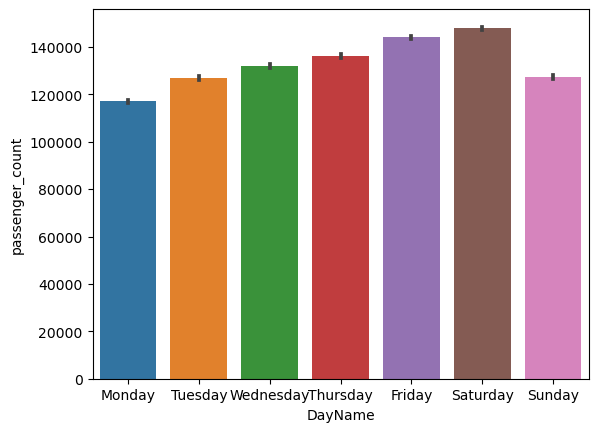

In [134]:
import seaborn as sns
sns.barplot(x='DayName', y='passenger_count', data=df.sort_values('DayOfWeek'), estimator=sum)

<Axes: xlabel='DayName', ylabel='fare_amount'>

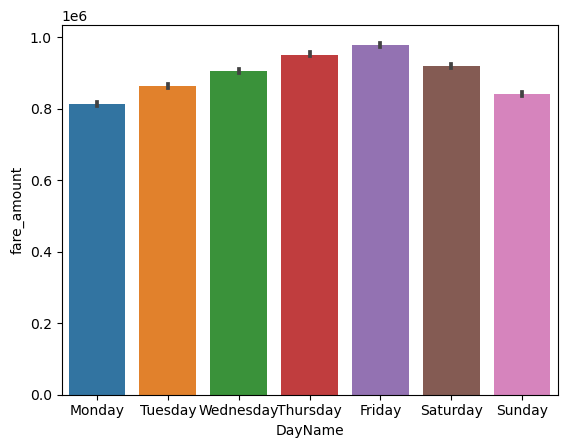

In [135]:
sns.barplot(x='DayName', y='fare_amount', data=df.sort_values('DayOfWeek'), estimator=sum)

In [136]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Date,Year,Month,Day,WeekOfYear,Hour,Minute,DayOfWeek,DayName,distance,pickup,dropoff
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,2014-12-06 20:36:22+00:00,2014,12,6,49,20,36,5,Saturday,0.003597,"(40.75190353393555, -73.97981262207031)","(40.7554817199707, -73.97944641113281)"
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013-01-17 17:22:00+00:00,2013,1,17,3,17,22,3,Thursday,0.000000,"(0.0, 0.0)","(0.0, 0.0)"
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2011-06-15 18:07:00+00:00,2011,6,15,24,18,7,2,Wednesday,0.022197,"(40.75322341918945, -73.99633026123047)","(40.766963958740234, -73.97889709472656)"
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,2009-12-14 12:33:00+00:00,2009,12,14,51,12,33,0,Monday,0.000000,"(40.74574661254883, -73.98242950439453)","(40.74574661254883, -73.98242950439453)"
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,2013-11-06 11:26:54+00:00,2013,11,6,45,11,26,2,Wednesday,0.012811,"(40.78105926513672, -73.95906066894531)","(40.76860427856445, -73.9620590209961)"


Text(0, 0.5, 'No. of Rides')

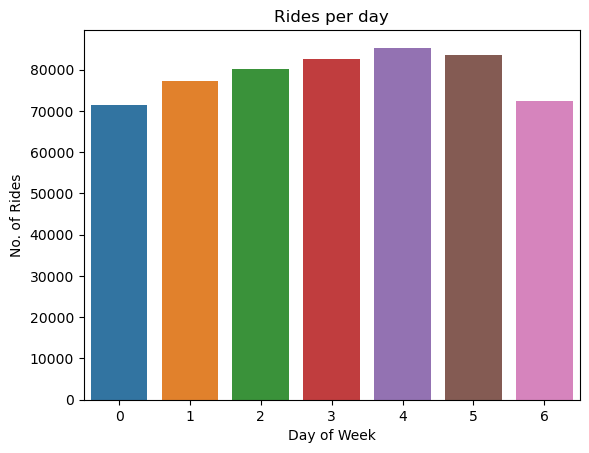

In [149]:
import matplotlib.pyplot as plt
plt.title('Rides per day')
ax = sns.countplot(x=df['DayOfWeek'].sort_values())
ax.set_xlabel("Day of Week")
ax.set_ylabel("No. of Rides")

In [142]:
?sns.countplot

Text(0, 0.5, 'No. of Rides')

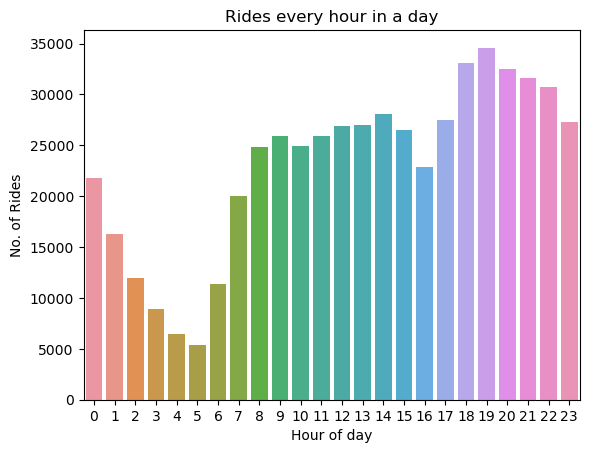

In [150]:
plt.title('Rides every hour in a day')
ax = sns.countplot(x=df['Hour'].sort_values())
ax.set_xlabel("Hour of day")
ax.set_ylabel("No. of Rides")

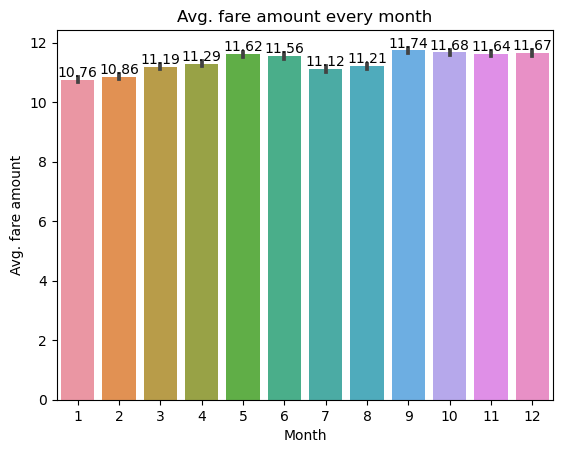

In [152]:
plt.title('Avg. fare amount every month')
ax = sns.barplot(x='Month', y='fare_amount', data=df.sort_values('Month'))
ax.set_xlabel("Month")
ax.set_ylabel("Avg. fare amount")
# Add labels to each bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),  # Format the value as a string
        (p.get_x() + p.get_width() / 2., p.get_height()), # Position of the text
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        xytext=(0, 5),  # Distance from the bar
        textcoords='offset points'
    )
plt.show()

KeyboardInterrupt: 

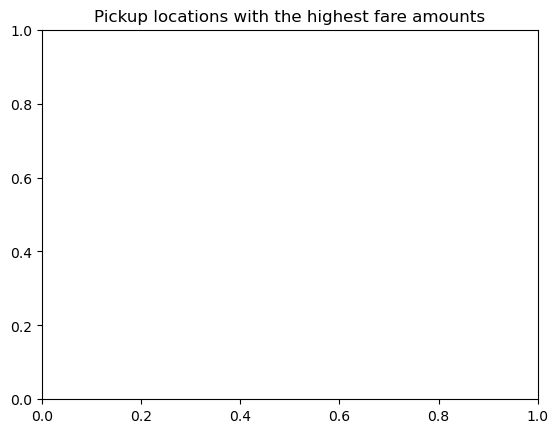

In [162]:
plt.title('Pickup locations with the highest fare amounts')
sns.barplot(data=df, x='fare_amount', y='pickup');

In [ ]:
?sns.barplot

In [159]:
# Select top 10 categories by value
top_10 = df.sort_values(by='fare_amount', ascending=False).head(10)

# Create the bar plot
ax = top_10.plot(x='fare_amount', y='pickup', kind='bar', figsize=(10, 6))
plt.title('Pickup locations with the highest fare amounts')
ax.set_xlabel("Fare amount")
ax.set_ylabel("Pickup location")

TypeError: no numeric data to plot

In [161]:
top_10 = df.sort_values(by='fare_amount', ascending=False).head(10)
top_10

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Date,Year,Month,Day,WeekOfYear,Hour,Minute,DayOfWeek,DayName,distance,pickup,dropoff
75372,499.000000,2011-03-20 08:08:00+00:00,-73.979179,40.749504,-73.979210,40.749481,1,2011-03-20 08:08:00+00:00,2011,3,20,11,8,8,6,Sunday,0.000038,"(40.74950408935547, -73.97917938232422)","(40.749481201171875, -73.97920989990234)"
289886,400.000000,2014-02-04 23:41:32+00:00,-73.977364,40.753597,-73.977364,40.753597,2,2014-02-04 23:41:32+00:00,2014,2,4,6,23,41,1,Tuesday,0.000000,"(40.753597259521484, -73.97736358642578)","(40.753597259521484, -73.97736358642578)"
306779,350.000000,2013-05-18 18:15:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2013-05-18 18:15:00+00:00,2013,5,18,20,18,15,5,Saturday,0.000000,"(0.0, 0.0)","(0.0, 0.0)"
486626,350.000000,2012-12-04 02:53:00+00:00,-73.828026,40.689346,0.000000,0.000000,2,2012-12-04 02:53:00+00:00,2012,12,4,49,2,53,1,Tuesday,84.298286,"(40.68934631347656, -73.8280258178711)","(0.0, 0.0)"
438690,300.000000,2012-05-11 18:21:52+00:00,-73.866432,40.740963,-73.866432,40.740963,1,2012-05-11 18:21:52+00:00,2012,5,11,19,18,21,4,Friday,0.000000,"(40.740962982177734, -73.8664321899414)","(40.740962982177734, -73.8664321899414)"
351171,269.500000,2011-09-10 14:55:00+00:00,0.000000,0.000000,0.000000,0.000000,1,2011-09-10 14:55:00+00:00,2011,9,10,36,14,55,5,Saturday,0.000000,"(0.0, 0.0)","(0.0, 0.0)"
319301,264.799988,2013-02-06 00:46:44+00:00,-73.808014,40.687523,-73.372993,41.238758,1,2013-02-06 00:46:44+00:00,2013,2,6,6,0,46,2,Wednesday,0.702213,"(40.687522888183594, -73.80801391601562)","(41.2387580871582, -73.37299346923828)"
14774,258.000000,2013-08-19 07:06:00+00:00,-73.789673,40.647446,-74.410416,40.478901,1,2013-08-19 07:06:00+00:00,2013,8,19,34,7,6,0,Monday,0.643218,"(40.64744567871094, -73.7896728515625)","(40.47890090942383, -74.41041564941406)"
241994,250.000000,2011-12-27 16:27:29+00:00,-73.681183,40.695320,-73.677238,40.694260,1,2011-12-27 16:27:29+00:00,2011,12,27,52,16,27,1,Tuesday,0.004084,"(40.69532012939453, -73.68118286132812)","(40.69425964355469, -73.67723846435547)"
387011,245.000000,2015-06-13 23:32:02+00:00,-73.383537,41.118507,-73.383537,41.118507,1,2015-06-13 23:32:02+00:00,2015,6,13,24,23,32,5,Saturday,0.000000,"(41.118507385253906, -73.38353729248047)","(41.118507385253906, -73.38353729248047)"


In [231]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Date,Year,Month,Day,WeekOfYear,Hour,Minute,DayOfWeek,DayName,distance,pickup,dropoff
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1,2014-12-06 20:36:22+00:00,2014,12,6,49,20,36,5,Saturday,0.003597,"(40.75190353393555, -73.97981262207031)","(40.7554817199707, -73.97944641113281)"
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2,2013-01-17 17:22:00+00:00,2013,1,17,3,17,22,3,Thursday,0.000000,"(0.0, 0.0)","(0.0, 0.0)"
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3,2011-06-15 18:07:00+00:00,2011,6,15,24,18,7,2,Wednesday,0.022197,"(40.75322341918945, -73.99633026123047)","(40.766963958740234, -73.97889709472656)"
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1,2009-12-14 12:33:00+00:00,2009,12,14,51,12,33,0,Monday,0.000000,"(40.74574661254883, -73.98242950439453)","(40.74574661254883, -73.98242950439453)"
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1,2013-11-06 11:26:54+00:00,2013,11,6,45,11,26,2,Wednesday,0.012811,"(40.78105926513672, -73.95906066894531)","(40.76860427856445, -73.9620590209961)"


In [232]:
#Dropping columns before I add them during feature engineering
df.drop(['Date','Year','Month','Day','WeekOfYear','Hour','Minute','DayOfWeek','DayName','distance','pickup','dropoff'], axis=1, inplace=True) 

In [37]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1


In [38]:
#3. Prepare the dataset for ML training

In [39]:
#Split Training & Validation Set

#I'll set aside 20% of the training data as the validation set, to evaluate the models I train on previously unseen data.
#Since the test set and training set have the same date ranges, I can pick a random 20% fraction.

from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [40]:
len(train_df), len(val_df)

(441960, 110490)

In [41]:
#Fill/Remove Missing Values

#There are no missing values in the sample, but if there were, I could simply drop the rows with missing values instead of 
#trying to fill them (since we have a lot of training data).

train_df = train_df.dropna()
val_df = val_df.dropna()

In [42]:
#Extract Inputs and Outputs

train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [43]:
input_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
target_col = ['fare_amount']

In [44]:
#Training

train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [45]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
353352,-73.993652,40.741543,-73.977974,40.742352,4
360070,-73.993805,40.724579,-73.993805,40.724579,1
372609,-73.959160,40.780750,-73.969116,40.761230,1
550895,-73.952187,40.783951,-73.978645,40.772602,1
444151,-73.977112,40.746834,-73.991104,40.750404,2
...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1
259178,-73.972656,40.764042,-74.013176,40.707840,2
365838,-73.991982,40.749767,-73.989845,40.720551,3
131932,-73.969055,40.761398,-73.990814,40.751328,1


In [46]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [47]:
#Validation

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [48]:
val_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
15971,-73.995834,40.759190,-73.973679,40.739086,1
149839,-73.977386,40.738335,-73.976143,40.751205,1
515867,-73.983910,40.749470,-73.787170,40.646645,1
90307,-73.790794,40.643463,-73.972252,40.690182,1
287032,-73.976593,40.761944,-73.991463,40.750309,2
...,...,...,...,...,...
467556,-73.968567,40.761238,-73.983406,40.750019,3
19482,-73.986725,40.755920,-73.985855,40.731171,1
186063,0.000000,0.000000,0.000000,0.000000,1
382260,-73.980057,40.760334,-73.872589,40.774300,1


In [49]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


In [50]:
#Test

test_inputs = test_df[input_cols]
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [51]:
#4. Train Hardcoded & Baseline Models

#4a. Hardcoded model: always predict average fare
#4b. Baseline model: Linear regression

#For evaluation the dataset uses RMSE error: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/overview/evaluation

In [52]:
#4a. Train & Evaluate Hardcoded Model
#Create a simple model that always predicts the average.

class MeanRegressor:
    def fit(self, inputs, targets):
        self.mean = targets.mean()
        
    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [53]:
mean_model = MeanRegressor()

In [54]:
mean_model.fit(train_inputs, train_targets)

In [55]:
mean_model.mean

fare_amount    11.354714
dtype: float32

In [56]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [57]:
val_preds = mean_model.predict(val_inputs)
val_preds

array([11.354714, 11.354714, 11.354714, ..., 11.354714, 11.354714,
       11.354714], dtype=float32)

In [58]:
val_targets

,fare_amount
15971,14.000000
149839,6.500000
515867,49.570000
90307,49.700001
287032,8.500000
...,...
467556,6.100000
19482,7.300000
186063,4.500000
382260,32.900002


In [59]:
#Using RMSE metric as given in the Kaggle dashboard for evaluation
from sklearn.metrics import mean_squared_error

def rmse(targets, preds):
    return mean_squared_error(targets, preds, squared=False)

In [60]:
train_rmse = rmse(train_targets, train_preds)
train_rmse

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.789782

In [61]:
train_targets

,fare_amount
353352,6.0
360070,3.7
372609,10.0
550895,8.9
444151,7.3
...,...
110268,9.3
259178,18.5
365838,10.1
131932,10.9


In [62]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.899954

In [63]:
#Any training model should be better than train_rmse value.

In [64]:
#4b. Train & Evaluate Baseline Model
#I'll train a linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [65]:
linear_model.fit(train_inputs, train_targets)

LinearRegression()

In [66]:
train_preds = linear_model.predict(train_inputs)
train_preds

array([[11.54623 ],
       [11.284612],
       [11.284142],
       ...,
       [11.458914],
       [11.284283],
       [11.28445 ]], dtype=float32)

In [67]:
val_preds = linear_model.predict(val_inputs)
val_preds

array([[11.28433 ],
       [11.284497],
       [11.284782],
       ...,
       [11.804502],
       [11.284435],
       [11.284135]], dtype=float32)

In [68]:
rmse(train_targets, train_preds)

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.788632

In [69]:
rmse(val_targets, val_preds)

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.898088

In [70]:
#The linear regression model is off by $9.898, which isn't much better than simply predicting the average.
#This is mainly because the training data (geocoordinates) is not in a format that's useful for the model, 
#and we're not using one of the most important columns: pickup date & time.
#However, now we have a baseline that our other models should ideally beat.

In [71]:
#5. Make predictions & submit to Kaggle

#> Make predictions for test set
#> Generate submissions CSV
#> Submit to Kaggle
#> Record in experiment tracking sheet

In [72]:
test_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982521,40.751259,-73.979652,40.746140,1
3,-73.981163,40.767807,-73.990448,40.751637,1
4,-73.966049,40.789776,-73.988564,40.744427,1
...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6
9910,-73.945511,40.803600,-73.960213,40.776371,6
9911,-73.991600,40.726608,-73.789742,40.647011,6
9912,-73.985573,40.735432,-73.939178,40.801731,6


In [73]:
test_preds = linear_model.predict(test_inputs)
test_preds

array([[11.284282],
       [11.284636],
       [11.284386],
       ...,
       [11.721236],
       [11.720786],
       [11.720582]], dtype=float32)

In [74]:
sub_df = pd.read_csv(data_dir+ '/sample_submission.csv')
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35
...,...,...
9909,2015-05-10 12:37:51.0000002,11.35
9910,2015-01-12 17:05:51.0000001,11.35
9911,2015-04-19 20:44:15.0000001,11.35
9912,2015-01-31 01:05:19.0000005,11.35


In [75]:
sub_df['fare_amount'] = test_preds
sub_df

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284282
1,2015-01-27 13:08:24.0000003,11.284636
2,2011-10-08 11:53:44.0000002,11.284386
3,2012-12-01 21:12:12.0000002,11.284224
4,2012-12-01 21:12:12.0000003,11.284052
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720265
9910,2015-01-12 17:05:51.0000001,11.720214
9911,2015-04-19 20:44:15.0000001,11.721236
9912,2015-01-31 01:05:19.0000005,11.720786


In [269]:
#Specify index=None, if not it will add index as a seperate column
sub_df.to_csv('linear_model_submission.csv', index=None)

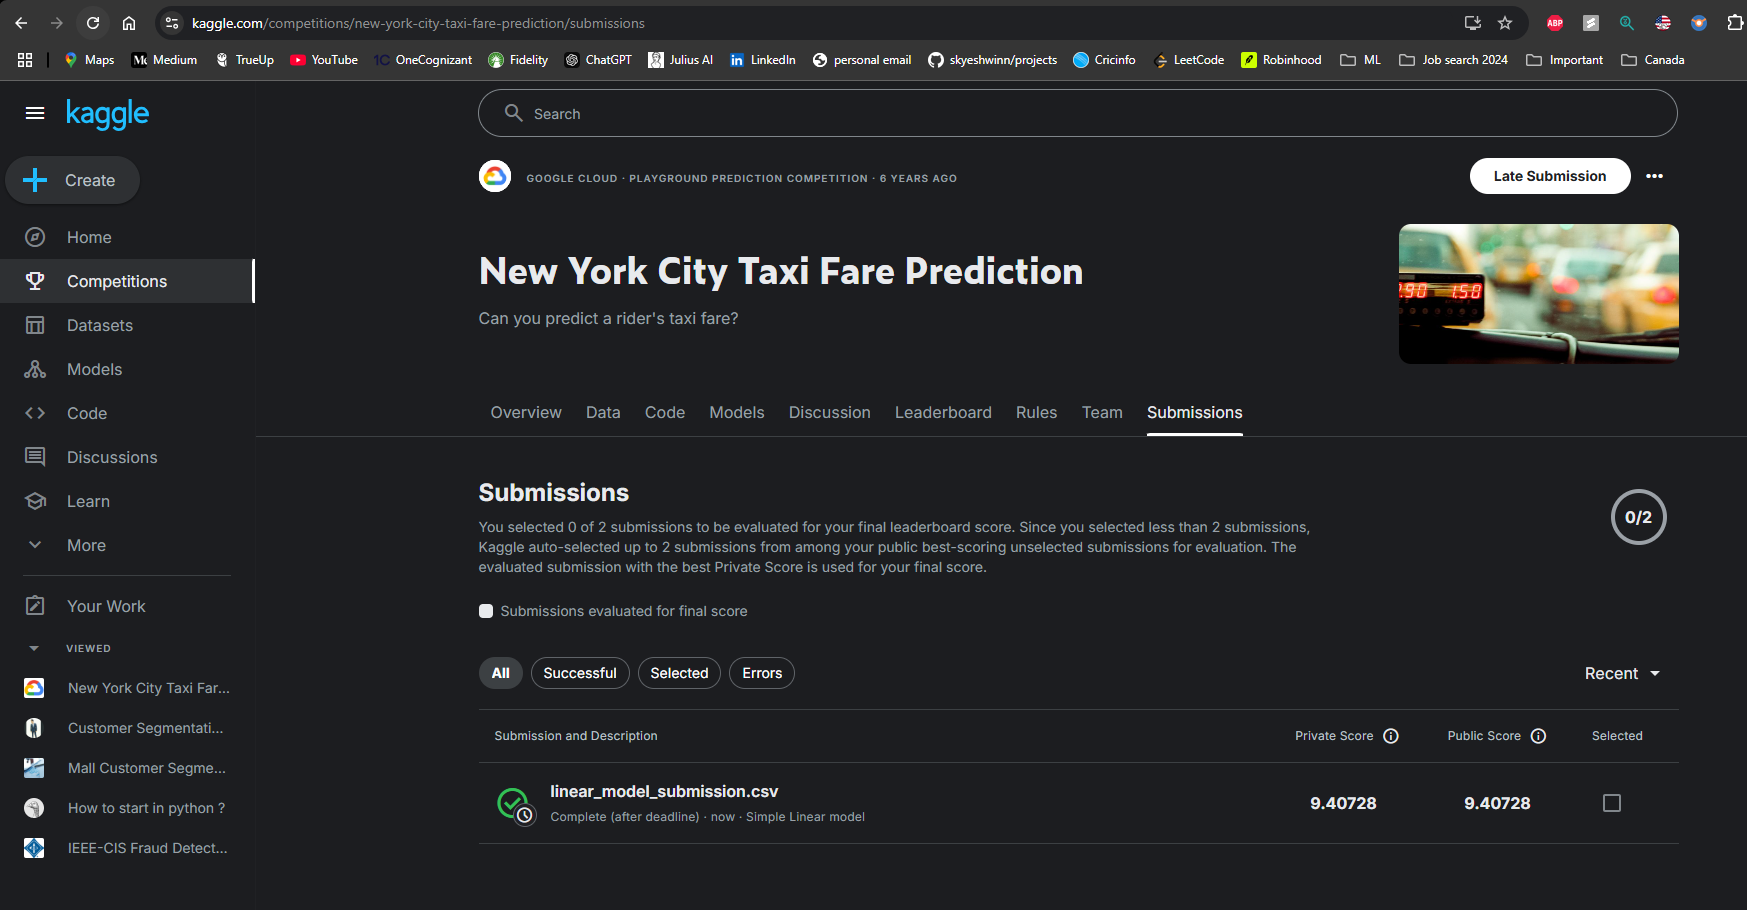

In [271]:
#Creating reusable functions for common tasks

def predict_and_submit(model, test_inputs, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [272]:
#A new submission file is created in the folder
predict_and_submit(linear_model, test_inputs, 'linear_sub2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.284282
1,2015-01-27 13:08:24.0000003,11.284636
2,2011-10-08 11:53:44.0000002,11.284386
3,2012-12-01 21:12:12.0000002,11.284224
4,2012-12-01 21:12:12.0000003,11.284052
...,...,...
9909,2015-05-10 12:37:51.0000002,11.720265
9910,2015-01-12 17:05:51.0000001,11.720214
9911,2015-04-19 20:44:15.0000001,11.721236
9912,2015-01-31 01:05:19.0000005,11.720786


In [76]:
#6. Feature Engineering

#a. Extract parts of date
#b. Add distance between pickup & drop
#c. Add distance from landmarks
#d. Remove outliers & invalid data

In [77]:
#a. Extract parts of date - year,month,day,weekday,hour

def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_hour'] = df[col].dt.hour

In [78]:
df.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.0,2014-12-06 20:36:22+00:00,-73.979813,40.751904,-73.979446,40.755482,1
1,8.0,2013-01-17 17:22:00+00:00,0.000000,0.000000,0.000000,0.000000,2
2,8.9,2011-06-15 18:07:00+00:00,-73.996330,40.753223,-73.978897,40.766964,3
3,6.9,2009-12-14 12:33:00+00:00,-73.982430,40.745747,-73.982430,40.745747,1
4,7.0,2013-11-06 11:26:54+00:00,-73.959061,40.781059,-73.962059,40.768604,1


In [79]:
add_dateparts(train_df, 'pickup_datetime')

In [80]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


In [81]:
add_dateparts(val_df, 'pickup_datetime')

In [82]:
add_dateparts(test_df, 'pickup_datetime')

In [83]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0
186063,4.500000,2009-05-21 08:13:16+00:00,0.000000,0.000000,0.000000,0.000000,1,2009,5,21,3,8
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16


In [84]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1


In [85]:
#b. Add Distance Between Pickup and Drop - Use the haversine distance

In [86]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18


In [87]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [88]:
def add_trip_distance(df):
    df['trip_distance'] = haversine_np(df['pickup_longitude'], 
                                       df['pickup_latitude'], 
                                       df['dropoff_longitude'], 
                                       df['dropoff_latitude'])

In [89]:
add_trip_distance(train_df)

In [90]:
add_trip_distance(val_df)

In [91]:
add_trip_distance(test_df)

In [92]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101


In [93]:
val_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
15971,14.000000,2015-05-19 09:27:24+00:00,-73.995834,40.759190,-73.973679,40.739086,1,2015,5,19,1,9,2.909793
149839,6.500000,2010-04-10 15:07:51+00:00,-73.977386,40.738335,-73.976143,40.751205,1,2010,4,10,5,15,1.433791
515867,49.570000,2009-07-25 14:11:00+00:00,-73.983910,40.749470,-73.787170,40.646645,1,2009,7,25,5,14,20.132486
90307,49.700001,2011-11-11 19:09:21+00:00,-73.790794,40.643463,-73.972252,40.690182,1,2011,11,11,4,19,16.152088
287032,8.500000,2015-03-09 18:06:44+00:00,-73.976593,40.761944,-73.991463,40.750309,2,2015,3,9,0,18,1.799553
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467556,6.100000,2010-04-03 20:16:00+00:00,-73.968567,40.761238,-73.983406,40.750019,3,2010,4,3,5,20,1.764959
19482,7.300000,2010-04-26 00:32:00+00:00,-73.986725,40.755920,-73.985855,40.731171,1,2010,4,26,0,0,2.751241
186063,4.500000,2009-05-21 08:13:16+00:00,0.000000,0.000000,0.000000,0.000000,1,2009,5,21,3,8,0.000000
382260,32.900002,2011-07-07 16:10:59+00:00,-73.980057,40.760334,-73.872589,40.774300,1,2011,7,7,3,16,9.176848


In [94]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321899
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423777
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.618015
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.959681
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.383829
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.123265
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.269084
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.171534
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.338154


In [95]:
#c. Add distance from popular landmarks

#Creative feature engineering is a lot more effective than excessive hyperparameter tuning. Just 1 or 2 good features improve
#the model's performance drastically.

#> JFK Airport
#> LGA Airport
#> EWR Airport
#> Times Square
#> Met Meuseum
#> World Trade Center

#Adding the distance from drop location.

In [96]:
jfk_lonlat = -73.7781, 40.6413
lga_lonlat = -73.8740, 40.7769
ewr_lonlat = -74.1745, 40.6895
met_lonlat = -73.9632, 40.7794
wtc_lonlat = -74.0099, 40.7126

In [97]:
def add_landmark_dropoff_distance(df, landmark_name, landmark_lonlat):
    lon, lat = landmark_lonlat
    df[landmark_name + '_drop_distance'] = haversine_np(lon, lat, df['dropoff_longitude'], df['dropoff_latitude'])

In [98]:
def add_landmarks(a_df):
    landmarks = [('jfk', jfk_lonlat), ('lga', lga_lonlat), ('ewr', ewr_lonlat), ('met', met_lonlat), ('wtc', wtc_lonlat)]
    for name, lonlat in landmarks:
        add_landmark_dropoff_distance(a_df, name, lonlat)

In [99]:
add_landmarks(train_df)

In [100]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411,20.241400,9.556355,17.564440,4.300385,4.261684
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000,20.397520,11.641132,15.713149,6.614004,1.900218
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504,20.894815,8.192266,19.044893,2.079418,6.402866
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912,22.322773,8.819165,18.902145,1.503061,7.168338
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267,21.658104,10.286617,16.863903,3.986955,4.489382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976,21.680714,8.973204,18.381714,2.244238,6.189971
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529,21.146925,14.006921,13.743814,8.996409,0.596505
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601,19.899387,11.589870,15.933608,6.913579,1.906144
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101,21.695084,10.233944,16.927792,3.889789,4.594002


In [101]:
add_landmarks(val_df)

In [102]:
add_landmarks(test_df)

In [103]:
#d. Remove Outliers and Invalid Data
# There seems to be some invalid data in these columns:Fare amount,Passenger count,Pickup latitude & longitude, Drop latitude & longitude

In [104]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000,552450.000000
mean,11.354059,-72.497063,39.910500,-72.504326,39.934265,1.684983
std,9.810809,11.622035,8.041162,12.065184,9.226158,1.337664
min,-52.000000,-1183.362793,-3084.490234,-3356.729736,-2073.150635,0.000000
25%,6.000000,-73.992020,40.734875,-73.991425,40.733990,1.000000
50%,8.500000,-73.981819,40.752621,-73.980179,40.753101,1.000000
75%,12.500000,-73.967155,40.767036,-73.963737,40.768059,2.000000
max,499.000000,2420.209473,404.983337,2467.752686,3351.403076,208.000000


In [105]:
test_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974716,40.751041,-73.973656,40.751740,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.433216,20.916754,9.675180,18.546659,4.512898,6.037652
std,0.042799,0.033542,0.039093,0.035436,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.969877,3.303940,3.295646,4.035816,4.018422,4.252535
min,-74.252190,40.573143,-74.263245,40.568974,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.401900,0.285629,0.284680,0.085747,0.040269
25%,-73.992500,40.736125,-73.991249,40.735253,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.297261,20.513337,8.311565,16.520517,2.126287,3.670107
50%,-73.982327,40.753052,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.215648,21.181472,9.477797,18.024350,3.698123,5.541466
75%,-73.968012,40.767113,-73.964062,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.043051,21.909794,10.965272,19.880536,5.922544,7.757612
max,-72.986534,41.709557,-72.990967,41.696682,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.933281,134.497726,126.062576,149.400787,130.347153,138.619492


In [106]:
#We'll use the following ranges: 
    #fare_amount: $1 to $500
    #longitudes: -75 to -72
    #latitudes: 40 to 42
    #passenger_count: 1 to 6

def remove_outliers(df):
    return df[(df['fare_amount'] >= 1.) & (df['fare_amount'] <= 500.) &
              (df['pickup_longitude'] >= -75) & (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) & (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 42) &
              (df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

def remove_outliers2(df):
    return df[(df['pickup_longitude'] >= -75) & (df['pickup_longitude'] <= -72) &
              (df['dropoff_longitude'] >= -75) & (df['dropoff_longitude'] <= -72) &
              (df['pickup_latitude'] >= 40) & (df['pickup_latitude'] <= 42) &
              (df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]

In [107]:
train_df = remove_outliers(train_df)
val_df = remove_outliers(val_df)
test_df = remove_outliers2(test_df)

In [108]:
train_df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,6.0,2015-04-12 03:40:38+00:00,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411,20.241400,9.556355,17.564440,4.300385,4.261684
360070,3.7,2011-01-26 19:21:00+00:00,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000,20.397520,11.641132,15.713149,6.614004,1.900218
372609,10.0,2012-10-03 10:40:17+00:00,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504,20.894815,8.192266,19.044893,2.079418,6.402866
550895,8.9,2012-03-14 13:44:27+00:00,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912,22.322773,8.819165,18.902145,1.503061,7.168338
444151,7.3,2012-02-05 15:33:00+00:00,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267,21.658104,10.286617,16.863903,3.986955,4.489382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,9.3,2009-09-06 16:12:00+00:00,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976,21.680714,8.973204,18.381714,2.244238,6.189971
259178,18.5,2009-04-12 09:58:56+00:00,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529,21.146925,14.006921,13.743814,8.996409,0.596505
365838,10.1,2012-07-12 19:30:00+00:00,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601,19.899387,11.589870,15.933608,6.913579,1.906144
131932,10.9,2011-02-17 18:33:00+00:00,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101,21.695084,10.233944,16.927792,3.889789,4.594002


In [109]:
test_df

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.321899,20.574911,9.760167,17.346842,4.239343,4.218709
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.423777,21.550976,11.315990,15.789623,5.382879,3.098136
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44+00:00,-73.982521,40.751259,-73.979652,40.746140,1,2011,10,8,5,11,0.618015,20.594069,9.526829,17.576965,3.946721,4.514503
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12+00:00,-73.981163,40.767807,-73.990448,40.751637,1,2012,12,1,5,21,1.959681,21.689365,10.195091,16.969650,3.843892,4.637048
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12+00:00,-73.966049,40.789776,-73.988564,40.744427,1,2012,12,1,5,21,5.383829,21.113993,10.295857,16.808367,4.433764,3.967223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51+00:00,-73.968124,40.796997,-73.955643,40.780388,6,2015,5,10,6,12,2.123265,21.507181,6.880905,21.015013,0.645683,8.809922
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51+00:00,-73.945511,40.803600,-73.960213,40.776371,6,2015,1,12,0,17,3.269084,21.462183,7.254931,20.464457,0.420341,8.229158
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15+00:00,-73.991600,40.726608,-73.789742,40.647011,6,2015,4,19,6,20,19.171534,1.169105,16.084494,32.772369,20.734238,19.933737
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19+00:00,-73.985573,40.735432,-73.939178,40.801731,6,2015,1,31,5,1,8.338154,22.402418,6.138518,23.410772,3.200790,11.556184


In [110]:
#Scaling and One-Hot Encoding - This involves scaling numeric columns to the (0,1) range and encoding categorical columns 
#using a one-hot encoder. I won't do this because I'll be training tree-based models which are generally able to do a good 
#job even without the above.

In [111]:
#7. Train & Evaluate Different Models
#I'll train each of the following & submit predictions to Kaggle: a.Ridge Regression, b.Random Forests, c.Gradient Boosting

In [112]:
#Split Inputs & Targets

In [113]:
train_df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance'],
      dtype='object')

In [114]:
input_cols = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_weekday', 'pickup_datetime_hour', 'trip_distance',
       'jfk_drop_distance', 'lga_drop_distance', 'ewr_drop_distance',
       'met_drop_distance', 'wtc_drop_distance']
target_col = 'fare_amount'

In [115]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

In [116]:
train_inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_weekday,pickup_datetime_hour,trip_distance,jfk_drop_distance,lga_drop_distance,ewr_drop_distance,met_drop_distance,wtc_drop_distance
353352,-73.993652,40.741543,-73.977974,40.742352,4,2015,4,12,6,3,1.323411,20.241400,9.556355,17.564440,4.300385,4.261684
360070,-73.993805,40.724579,-73.993805,40.724579,1,2011,1,26,2,19,0.000000,20.397520,11.641132,15.713149,6.614004,1.900218
372609,-73.959160,40.780750,-73.969116,40.761230,1,2012,10,3,2,10,2.325504,20.894815,8.192266,19.044893,2.079418,6.402866
550895,-73.952187,40.783951,-73.978645,40.772602,1,2012,3,14,2,13,2.558912,22.322773,8.819165,18.902145,1.503061,7.168338
444151,-73.977112,40.746834,-73.991104,40.750404,2,2012,2,5,6,15,1.243267,21.658104,10.286617,16.863903,3.986955,4.489382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,-73.987152,40.750633,-73.979073,40.763168,1,2009,9,6,6,16,1.549976,21.680714,8.973204,18.381714,2.244238,6.189971
259178,-73.972656,40.764042,-74.013176,40.707840,2,2009,4,12,6,9,7.116529,21.146925,14.006921,13.743814,8.996409,0.596505
365838,-73.991982,40.749767,-73.989845,40.720551,3,2012,7,12,3,19,3.251601,19.899387,11.589870,15.933608,6.913579,1.906144
131932,-73.969055,40.761398,-73.990814,40.751328,1,2011,2,17,3,18,2.146101,21.695084,10.233944,16.927792,3.889789,4.594002


In [117]:
train_targets

353352     6.0
360070     3.7
372609    10.0
550895     8.9
444151     7.3
          ... 
110268     9.3
259178    18.5
365838    10.1
131932    10.9
121958     9.5
Name: fare_amount, Length: 431143, dtype: float32

In [118]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

In [119]:
test_inputs = test_df[input_cols]

In [120]:
#Let's define a helper function to evaluate models and generate test predictions

def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = rmse(train_targets, train_preds)
    val_preds = model.predict(val_inputs)
    val_rmse = rmse(val_targets, val_preds)
    return train_rmse, val_rmse, train_preds, val_preds

In [121]:
def predict_and_submit(model, test_inputs, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sample_submission.csv')
    sub_df['fare_amount'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [122]:
#a. Ridge Regression

from sklearn.linear_model import Ridge

In [123]:
model1 = Ridge(random_state=42, alpha=0.9)

In [124]:
model1.fit(train_inputs, train_targets)

Ridge(alpha=0.9, random_state=42)

In [125]:
evaluate(model1)

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(5.359582822908383,
 5.545574784745605,
 array([ 8.45117959,  4.08333777,  9.36416834, ...,  9.99445374,
         8.49772496, 10.267829  ]),
 array([10.98505424,  6.66187582, 43.27326553, ...,  7.85116099,
        27.22279111,  9.32884776]))

In [126]:
train_inputs.shape

(431143, 16)

In [127]:
predict_and_submit(model1, test_inputs, 'ridge_submission2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.315843
1,2015-01-27 13:08:24.0000003,11.173787
2,2011-10-08 11:53:44.0000002,5.919796
3,2012-12-01 21:12:12.0000002,9.061893
4,2012-12-01 21:12:12.0000003,14.418313
...,...,...
9909,2015-05-10 12:37:51.0000002,9.653107
9910,2015-01-12 17:05:51.0000001,11.755897
9911,2015-04-19 20:44:15.0000001,45.099279
9912,2015-01-31 01:05:19.0000005,20.977682


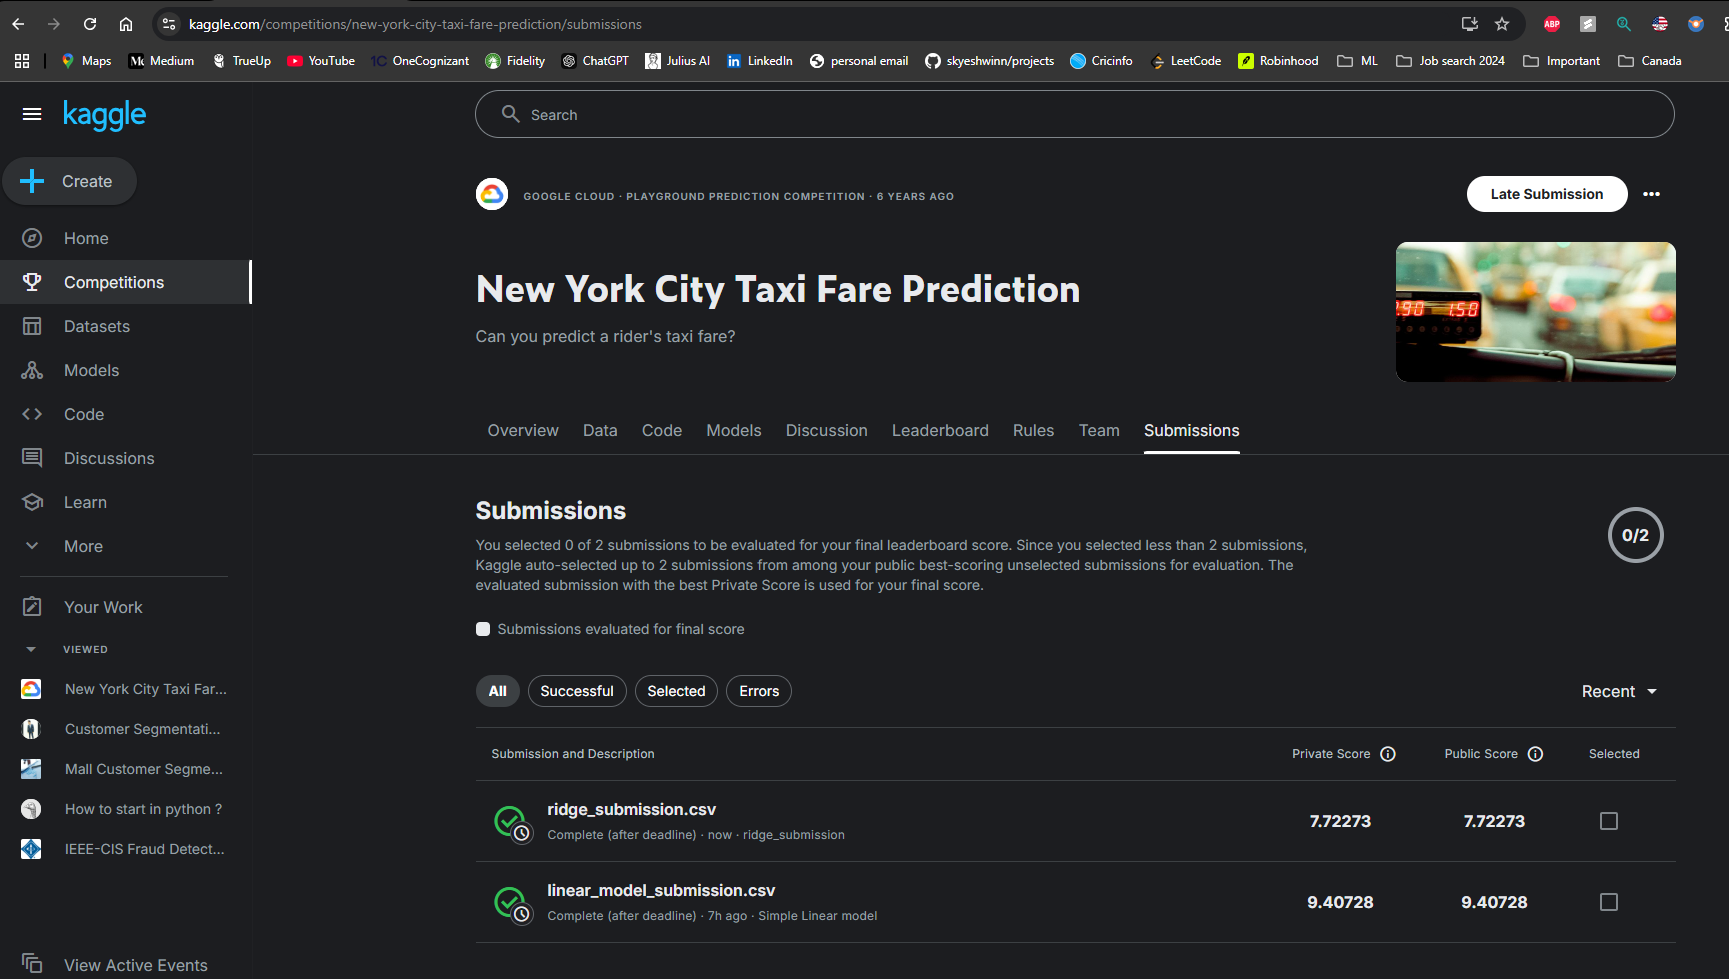

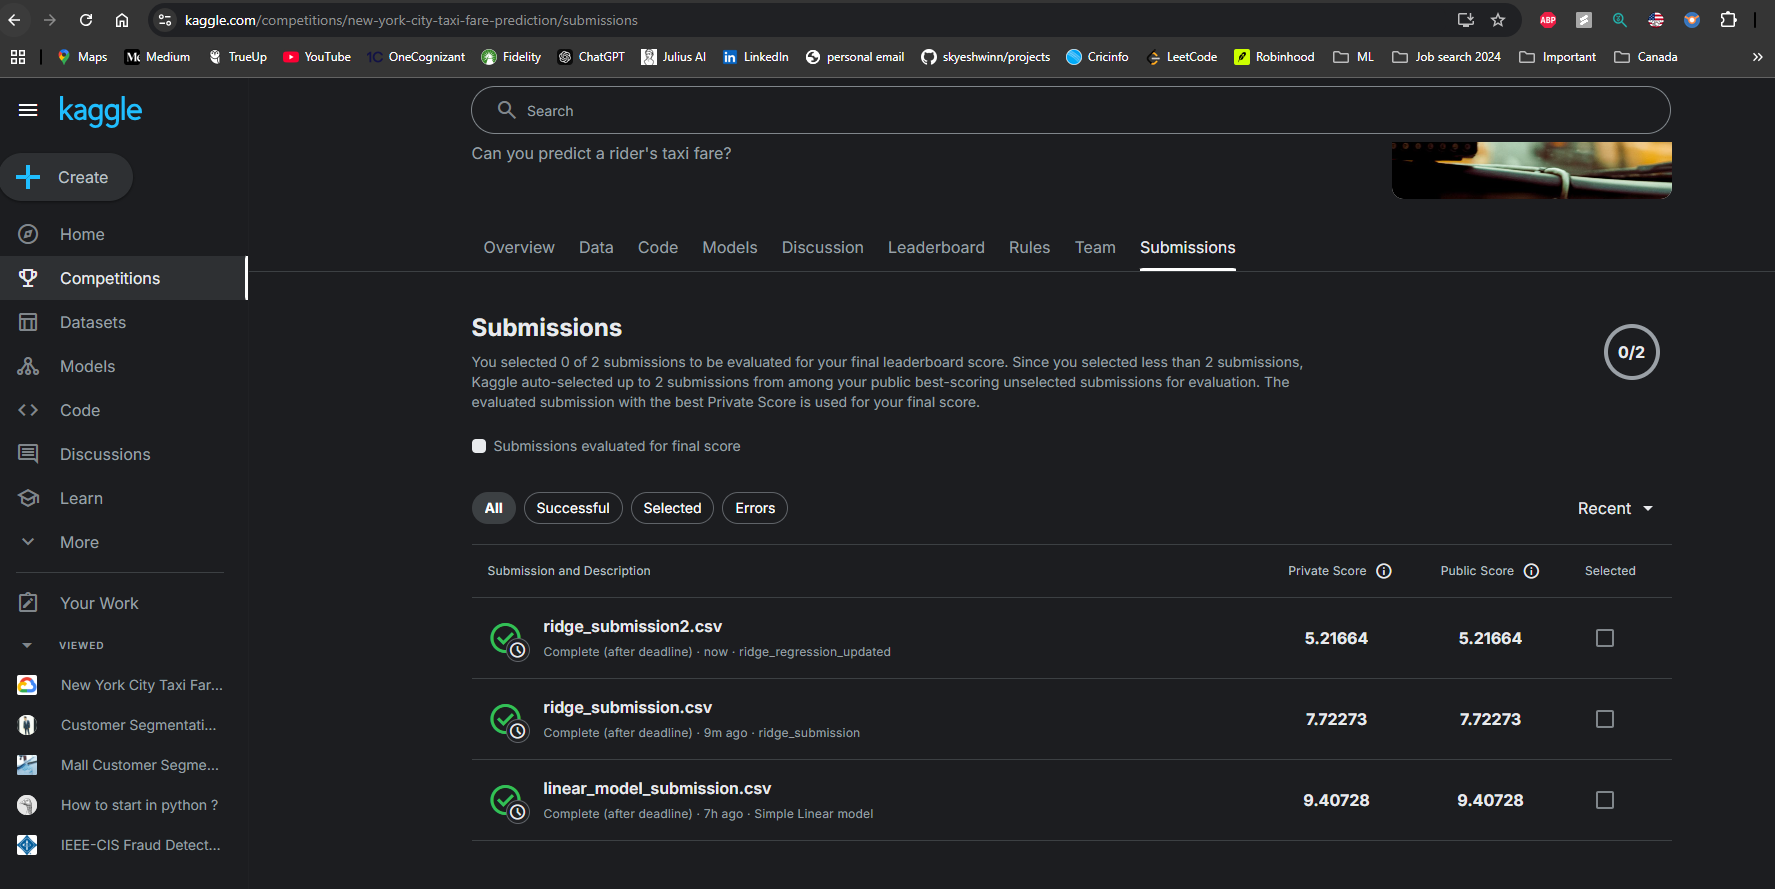

In [128]:
#b. Random Forest

from sklearn.ensemble import RandomForestRegressor

In [129]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=50)

In [130]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: total: 8min 36s
Wall time: 2min 18s


RandomForestRegressor(max_depth=10, n_estimators=50, n_jobs=-1, random_state=42)

In [131]:
evaluate(model2)

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(3.61420821663934,
 4.163113115850091,
 array([ 6.90753147,  9.21624803,  9.24746139, ..., 10.36057165,
         7.78102192, 10.42900854]),
 array([12.37111498,  6.17139181, 47.21582519, ...,  8.33083339,
        29.03966889,  8.24773256]))

In [132]:
predict_and_submit(model2, test_inputs, 'rf_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.469281
1,2015-01-27 13:08:24.0000003,10.496371
2,2011-10-08 11:53:44.0000002,5.040760
3,2012-12-01 21:12:12.0000002,8.407330
4,2012-12-01 21:12:12.0000003,14.267172
...,...,...
9909,2015-05-10 12:37:51.0000002,8.557240
9910,2015-01-12 17:05:51.0000001,12.367425
9911,2015-04-19 20:44:15.0000001,54.743851
9912,2015-01-31 01:05:19.0000005,21.730624


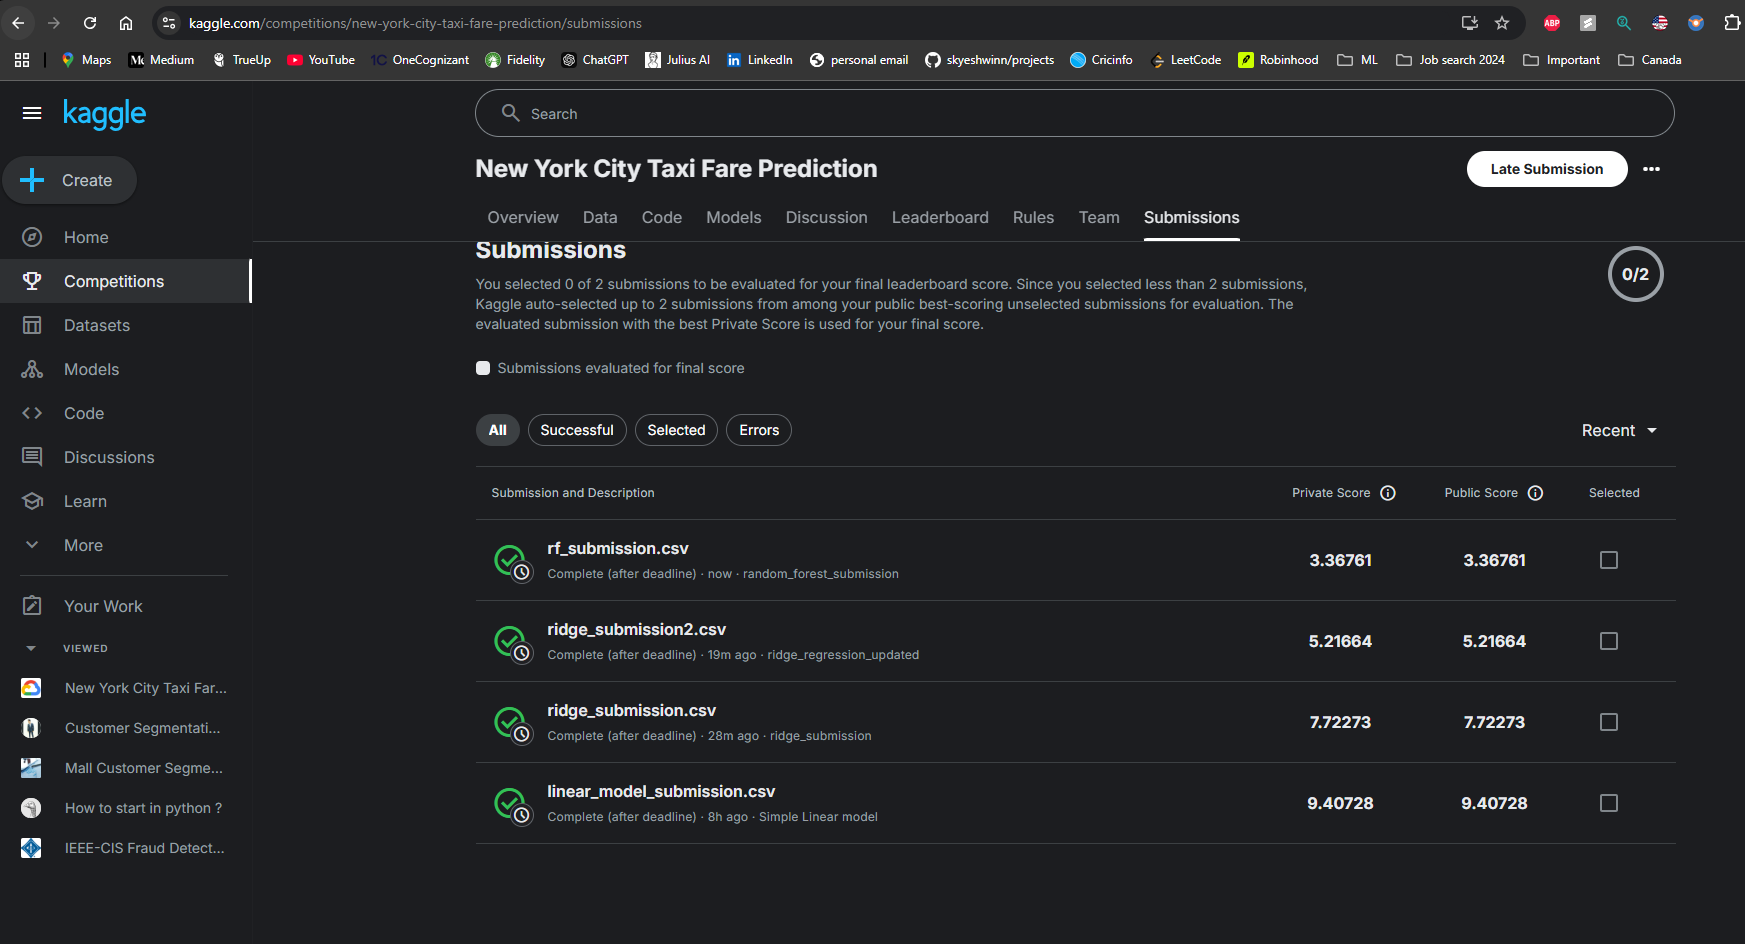

In [133]:
#c. Gradient Boosting

from xgboost import XGBRegressor

In [134]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror', n_estimators=200)

In [135]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: total: 22.2 s
Wall time: 6.62 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [136]:
evaluate(model3)

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2.891529,
 4.0441804,
 array([ 6.611962,  8.49979 ,  9.926862, ..., 11.801107,  9.639876,
         9.739779], dtype=float32),
 array([14.917534 ,  5.5005436, 48.309845 , ...,  8.006911 , 31.094017 ,
         8.578064 ], dtype=float32))

In [137]:
predict_and_submit(model3, test_inputs, 'xgb_submission2.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.428720
1,2015-01-27 13:08:24.0000003,10.872562
2,2011-10-08 11:53:44.0000002,4.865466
3,2012-12-01 21:12:12.0000002,8.292737
4,2012-12-01 21:12:12.0000003,15.742914
...,...,...
9909,2015-05-10 12:37:51.0000002,8.867249
9910,2015-01-12 17:05:51.0000001,11.219039
9911,2015-04-19 20:44:15.0000001,55.348549
9912,2015-01-31 01:05:19.0000005,19.423466


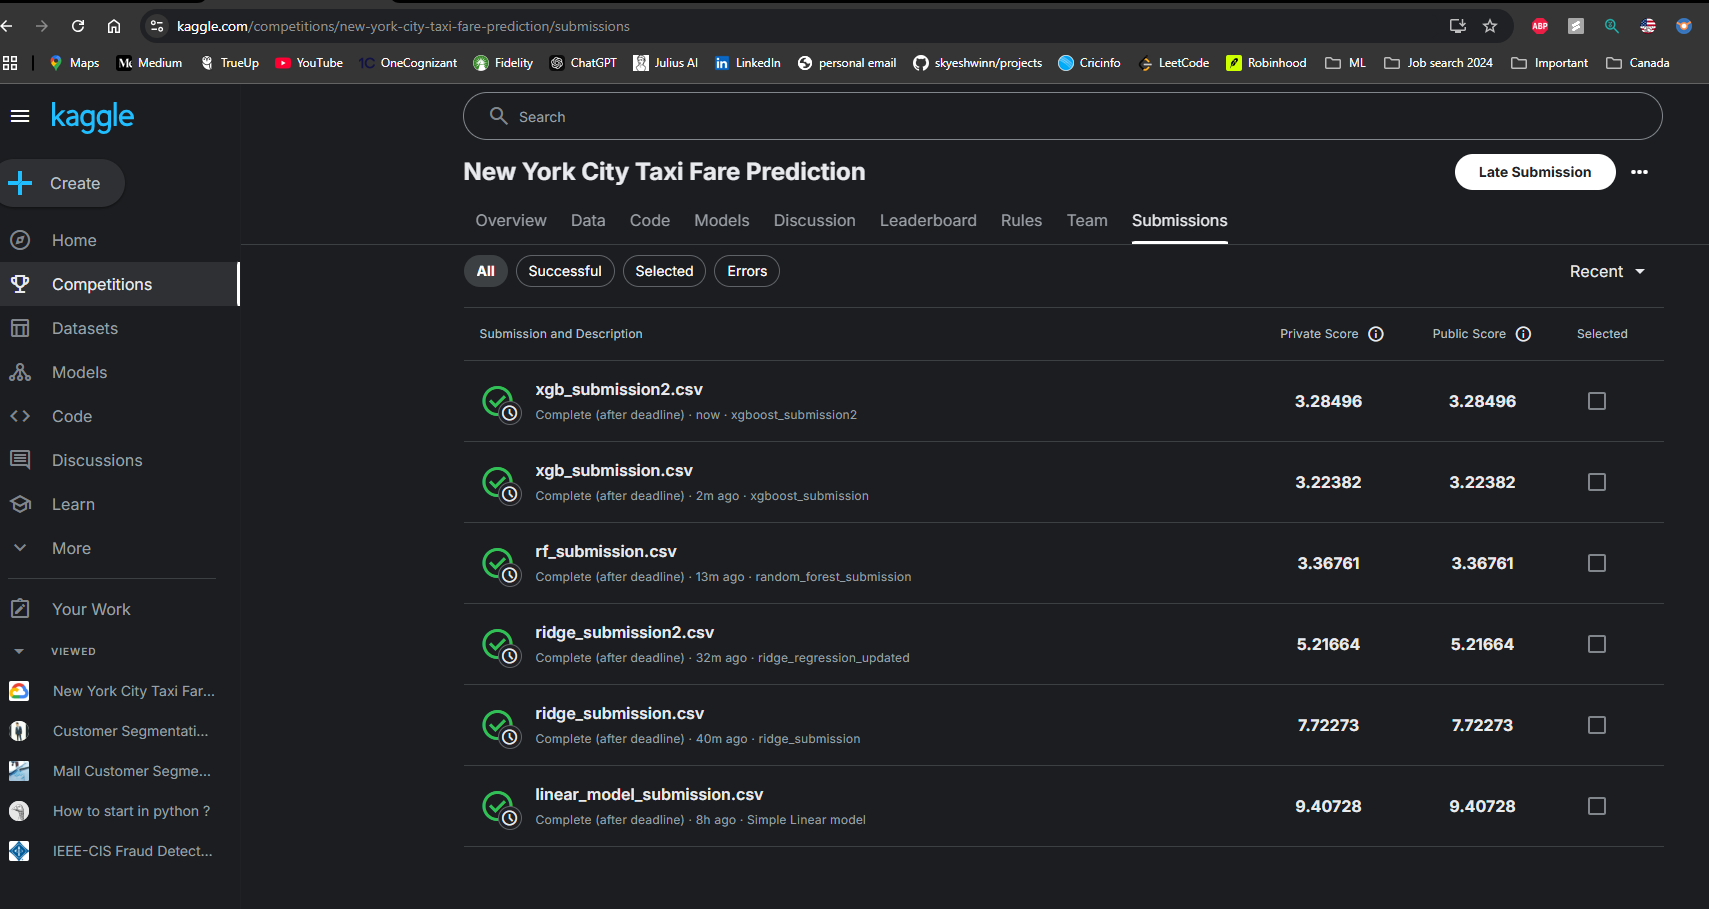

In [376]:
#There's scope for improvement with Hyperparameter tuning.

In [377]:
#8. Tune Hyperparmeters

#Let's define a helper function for trying different hyperparameters.

In [138]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [139]:
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

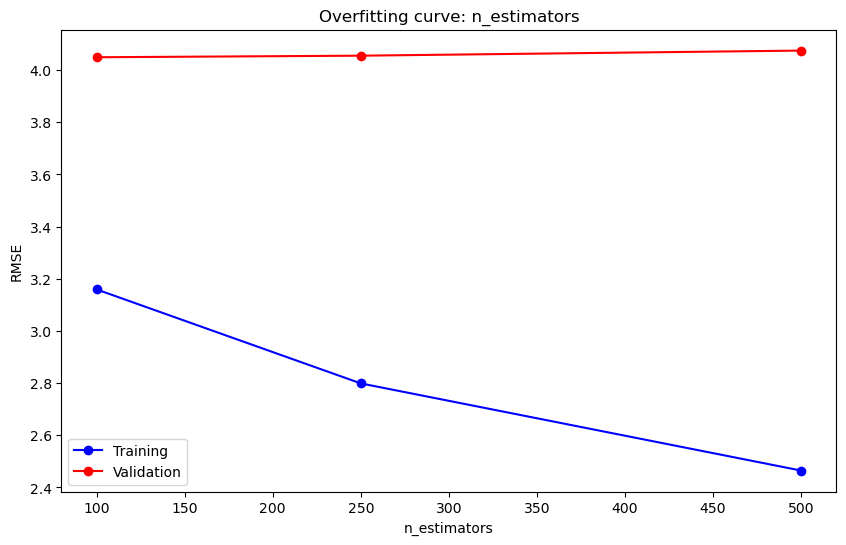

In [141]:
#No. of Trees

test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [142]:
#Seems like 500 estimators has the lowest validation loss. However, it also takes a long time. Let's stick with 250 for now.

best_params['n_estimators'] = 250

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

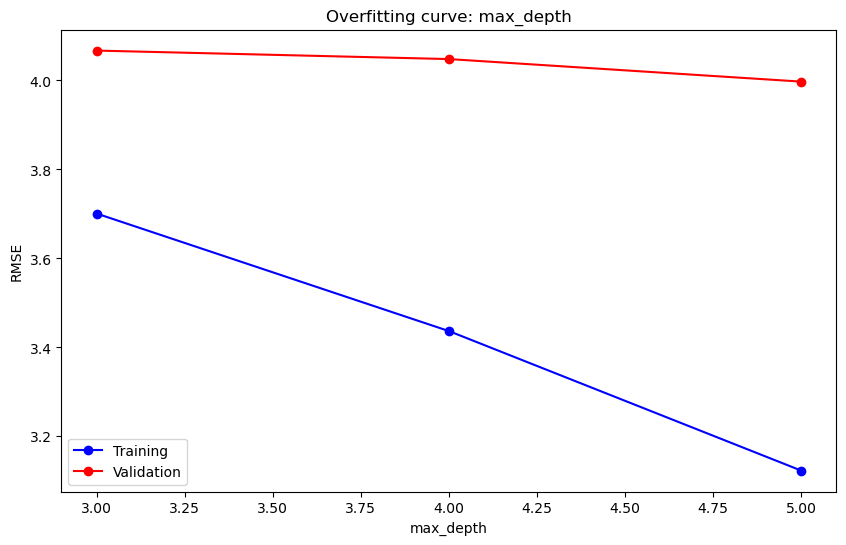

In [143]:
#Max Depth

test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

In [144]:
#Looks like a max depth of 5 is ideal.

best_params['max_depth'] = 5

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

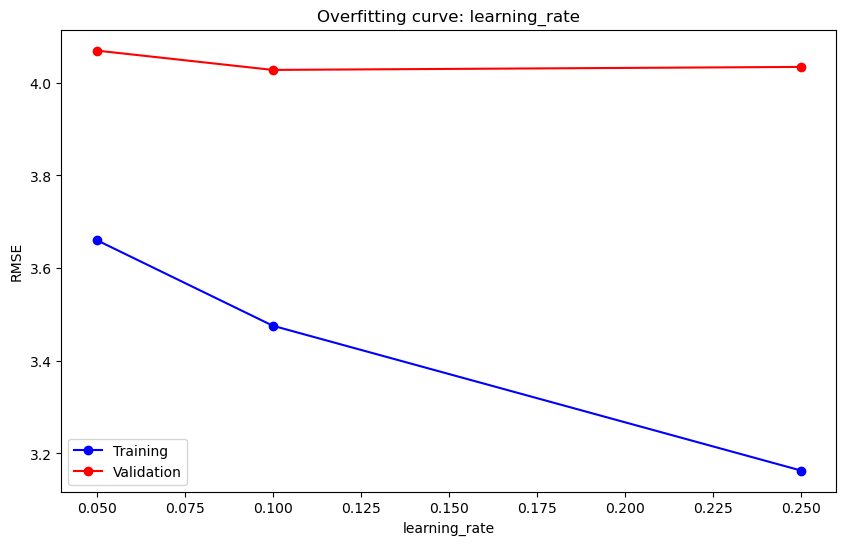

In [145]:
#Learning Rate

test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [146]:
#Seems like the best learning rate is 0.25.

best_params['learning_rate'] = 0.25

In [147]:
#Other Parameters
#Similarly we can experiment with other parameters.

#Here's a set of parameters that works well:

xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)

In [148]:
xgb_model_final.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [149]:
evaluate(xgb_model_final)

C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\skyes\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(3.2248414,
 4.0279527,
 array([ 6.3882766,  7.775924 , 10.150974 , ..., 11.779233 ,  9.300532 ,
        10.211974 ], dtype=float32),
 array([14.329057,  5.898548, 48.295357, ...,  7.653948, 30.876308,
         8.694201], dtype=float32))

In [151]:
predict_and_submit(xgb_model_final, test_inputs, 'xgb_tuned_submission.csv')

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.965448
1,2015-01-27 13:08:24.0000003,11.147516
2,2011-10-08 11:53:44.0000002,4.914603
3,2012-12-01 21:12:12.0000002,8.419588
4,2012-12-01 21:12:12.0000003,15.607650
...,...,...
9909,2015-05-10 12:37:51.0000002,8.884975
9910,2015-01-12 17:05:51.0000001,11.796254
9911,2015-04-19 20:44:15.0000001,53.805199
9912,2015-01-31 01:05:19.0000005,19.271948


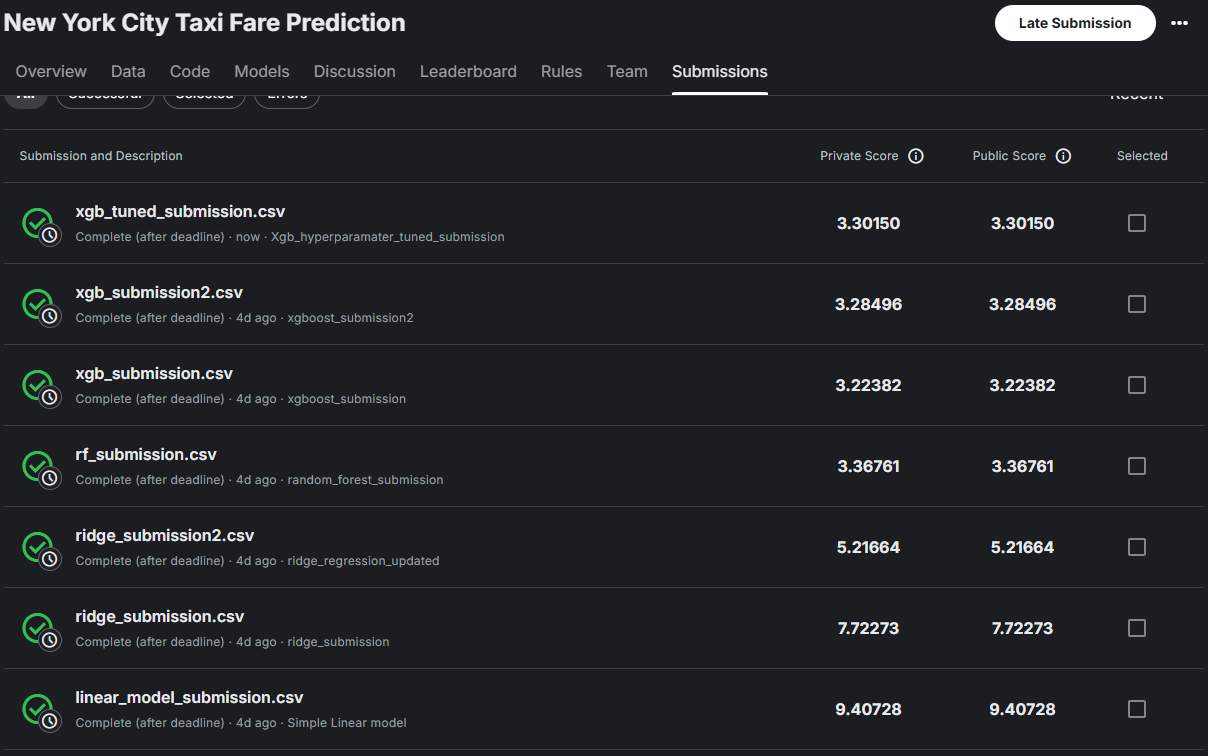

In [1]:
#Final submission result:

#This puts me in the top 30% of list of participants submitted previously. This is pretty amazing considering:
#> I was using just 1% of the training data
#> I was using only a single model (most top submissions use ensembles)
#> My best model takes just 10 minutes to train (as oppposed to hours/days)
#> I haven't fully optimized the hyperparameters yet

#Similarly, this could be enhanced by the below steps:

#> Tuning hyperparameters for Linear Regression & random forests.
#> Repeating with 3%, 10%, 30% and 100% of the training set. How much reduction in error does 100x more data produce?
#> Ensembling (averaging) the results from multiple models and observe if they're better than individual models.